## **Hands-on Assignment 2: Introduction to Pandas and Large Language Model (LLM)-assisted coding**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Introduction
Data cleaning and data manipulation are the first steps of most any analysis. They ensure that the data you analyze are of acceptable quality and that they are in the correct format for use in further applications.

Here you will gain experience performing these steps with a real-world medical dataset to produce a modified version that hones in on specific aspects of the data.

The data you will be using a dataset published by The National Heart, Lung and Blood Institute (NHLBI) from a clinical trial known as the Digitalis Investigation Group (DIG) Trial. This data contains baseline and outcome information for chronic heart failure patients from the DIG Trial cohort who received either the drug Digoxin or a placebo. Here, outcomes have been recorded under two main categories, cardiovasular mortality and hospitalization.

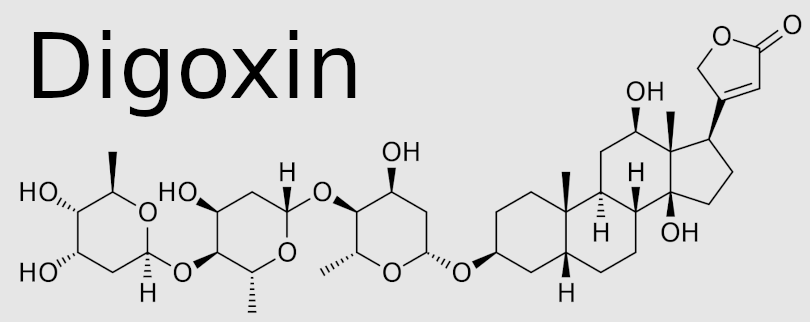

For more information, you may refer to a comprehensive description of this dataset here:

https://biolincc.nhlbi.nih.gov/media/teachingstudies/digdoc.pdf?link_time=2022-09-20_07:24:09.208947

## **Instructions**:
In your own Colab notebook, use the commands presented in the previous sections to perform the following DataFrame manipulations using Pandas. You will be graded based on whether your Colab notebook can modify the DataFrame according to the steps below and export it as a .csv file.

## **Steps:**
To start, import this dataset as a Pandas DataFrame using this direct link to this dataset:

https://drive.google.com/uc?export=download&id=1M0ZFQ09JPZGPm0cVJ0gXwENSgwf84cd2

In [1]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1M0ZFQ09JPZGPm0cVJ0gXwENSgwf84cd2')


After obtaining a new dataset, it is important get a sense for what information it contains. Start by viewing just the beginning of the file.

In [2]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1M0ZFQ09JPZGPm0cVJ0gXwENSgwf84cd2')
df.head(10)

,ID,TRTMT,AGE,RACE,SEX,EJF_PER,EJFMETH,CHESTX,BMI,KLEVEL,...,OTH,OTHDAYS,HOSP,HOSPDAYS,NHOSP,DEATH,DEATHDAY,REASON,DWHF,DWHFDAYS
0,1,0,66,1,1,40,2,0.50,20.073,NaN,...,1,533,1,533,6,0,1438,NaN,1,1379
1,2,0,77,1,1,12,1,0.56,20.701,3.1,...,1,880,1,468,4,1,1360,1.0,1,1329
2,3,0,72,1,2,36,1,0.68,25.530,5.1,...,0,1391,1,631,2,0,1391,NaN,1,631
3,4,1,57,1,1,31,1,0.48,25.794,NaN,...,0,1157,0,1157,0,0,1157,NaN,0,1157
4,5,0,74,1,1,15,1,0.53,25.654,4.0,...,1,459,1,191,5,0,1550,NaN,1,191
5,6,0,69,2,2,45,1,0.70,27.770,4.3,...,1,966,1,496,5,0,1620,NaN,0,1620
6,7,1,64,1,2,30,1,0.52,31.694,4.3,...,0,903,0,903,0,1,903,2.0,0,903
7,8,1,60,2,1,39,1,0.40,25.110,5.1,...,0,1369,0,1369,0,0,1369,NaN,0,1369
8,9,0,74,2,1,33,3,0.49,23.688,4.7,...,0,1747,0,1747,0,0,1747,NaN,0,1747
9,10,1,64,1,2,24,1,0.52,28.697,4.0,...,1,283,1,149,2,0,1074,NaN,0,1074


Of note, here are the columns we will be focusing on for this assignment. Start by creating a Python list containing the name of these columns of interest.

・age (AGE)

・whether they were white or nonwhite (RACE)

・sex (SEX)

・percent Ejection Fraction (EJF_PER)

・Serum Creatinine Level (CREAT)

・Serum Potassium Level (KLEVEL)

・Approximate duration of Congestive Heart Failure (CHFDUR)

・Etiology of Congestive Heart Failure (CHFETIOL)

・Previous Myocardial Infarction (PREVMI)

・History of Diabetes (DIABETES)

・History of Hypertension (HYPERTEN)

・Dose of Digoxin/placebo Prescribed (mg/day) (DIGDOSE)

・Cardiovascular Disease Hospitalization (CVD)

・Worsening Heart Failure (WHF)

・Digoxin Toxicity (DIG)

・First Hospitalization for any reason (HOSP)

・Number of Hospitalizations (NHOSP)

・Death (DEATH)

・Reason for Death (REASON)

In [ ]:
list = [
    'AGE',
    'RACE',
    'SEX',
    'EJF_PER',
    'CREAT',
    'KLEVEL',
    'CHFDUR',
    'CHFETIOL',
    'PREVMI',
    'DIABETES',
    'HYPERTEN',
    'DIGDOSE',
    'CVD',
    'WHF',
    'DIG',
    'HOSP',
    'NHOSP',
    'DEATH',
    'REASON'
]
list

['AGE',
 'RACE',
 'SEX',
 'EJF_PER',
 'CREAT',
 'KLEVEL',
 'CHFDUR',
 'CHFETIOL',
 'PREVMI',
 'DIABETES',
 'HYPERTEN',
 'DIGDOSE',
 'CVD',
 'WHF',
 'DIG',
 'HOSP',
 'NHOSP',
 'DEATH',
 'REASON']

Then, create a DataFrame with a new name that only contains those columns.

In [ ]:
df_new=df[list]


Next, we will want to scan our new DataFrame for NaN values that may hinder later analyses. To do so, run the following code where df_reduced is the name of your reduced DataFrame.

In [ ]:
df_new.isnull().sum()


AGE            0
RACE           0
SEX            0
EJF_PER        0
CREAT          0
KLEVEL       801
CHFDUR        14
CHFETIOL      18
PREVMI         1
DIABETES       0
HYPERTEN       1
DIGDOSE        1
CVD            0
WHF            0
DIG            0
HOSP           0
NHOSP          0
DEATH          0
REASON      4425
dtype: int64

Based on this, we can see that there are NaN values in the DataFrame's KLEVEL, CHFDUR, CHFETIOL, PREVMI, HYPERTEN, DIGDOSE, and REASON columns. Let's consider potentional reasons for these NaNs and figure out how we should deal with them.

Since the KLEVEL and CHFDUR columns contain numeric measurements, let's delete any rows that contain NaN values in those columns as they may break downstream calculations.

In [ ]:
df_reduced=df_new.dropna(subset=['KLEVEL', 'CHFDUR'])


Afterwards, you should no longer see NaNs in the KLEVEL or CHFDUR columns. You can confirm this by running this line of code if the name of your cleaned DataFrame is df_reduced_cleaned.

In [ ]:
df_reduced.isnull().sum()

AGE            0
RACE           0
SEX            0
EJF_PER        0
CREAT          0
KLEVEL         0
CHFDUR         0
CHFETIOL      17
PREVMI         1
DIABETES       0
HYPERTEN       1
DIGDOSE        1
CVD            0
WHF            0
DIG            0
HOSP           0
NHOSP          0
DEATH          0
REASON      3899
dtype: int64

As for the rest of the NaN values, since they are all strictly categorical, we can convert the NaN to the string 'Not given' and report it as such. in the rest of the columns, we will leave them untouched as those columns are strictly categorical and can be reported as such. For example, Etiology of Congestive Heart Failure could be Ischemic, Hypertensive, Valvular, Idiopathic, Alcohol related, other, or Not Given.

In [ ]:
#Notification: In the pandas function 'fillna', there is no parameter 'subset' that you can define the column names as it in pandas function "dropna"
df_reduced_new = df_reduced[['CHFETIOL', 'PREVMI','DIGDOSE','REASON']].fillna('Not Given')
df_reduced_new

,CHFETIOL,PREVMI,DIGDOSE,REASON
1,4.0,1.0,0.25,1.0
2,1.0,0.0,0.25,Not Given
4,4.0,0.0,0.375,Not Given
5,4.0,1.0,0.25,Not Given
6,1.0,1.0,0.25,2.0
7,1.0,0.0,0.25,Not Given
8,4.0,0.0,0.125,Not Given
9,1.0,0.0,0.25,Not Given
10,1.0,1.0,0.25,Not Given
11,1.0,1.0,0.25,1.0


However, the function fillna seems creat a new datafame to store the modified columns rather than directly modify on the original dataframe when I use the above code. If I want to direclt modify on the original dataframe, I need to specify the columns that I want to modify.

In [ ]:
df_reduced[['CHFETIOL', 'PREVMI', 'HYPERTEN', 'DIGDOSE', 'REASON']] = df_reduced[['CHFETIOL', 'PREVMI', 'HYPERTEN', 'DIGDOSE', 'REASON']].fillna('Not Given')
df_reduced

Output hidden; open in https://colab.research.google.com to view.

You may run this line of code again to confirm that all NaN values have been taken care of.

In [ ]:
df_reduced.isnull().sum()

AGE         0
RACE        0
SEX         0
EJF_PER     0
CREAT       0
KLEVEL      0
CHFDUR      0
CHFETIOL    0
PREVMI      0
DIABETES    0
HYPERTEN    0
DIGDOSE     0
CVD         0
WHF         0
DIG         0
HOSP        0
NHOSP       0
DEATH       0
REASON      0
dtype: int64

From here, we can make further manipulations to this DataFrame to look into specific subgroups of patients, such as all patients with a history of diabetes, all patients with a history of hypertension, and those with a history of both.

To facilitate this comparison, let's create an additional column named DIABETES_AND_HYPERTEN that contains the value 1 if a patient has a history of both diabetes and hypertension, and 0 if they do not. To simplify calulation, 1 and 0 should be integers, not strings.

Start by creating the new column with all cells contining the value of 0.

In [ ]:
df_reduced['DIABETES_AND_HYPERTEN'] = 0
df_reduced


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Check the type of the value in each column
print(df_reduced['DIABETES'].dtypes)
print(df_reduced['HYPERTEN'].dtypes)
print(df_reduced['DIABETES_AND_HYPERTEN'].dtypes)



int64
object
int64


Then, convert cells in the DIABETES_AND_HYPERTEN column for patients with a history of both Diabetes and Hypertension from 0 into 1.

( Hint: Keep in mind what data types are stored in each column. )

In [ ]:
#The type of the value in 'DIABETES' are integer, so it needs to be converted into string
df_reduced['DIABETES'] = df_reduced['DIABETES'].astype(int)

#Confirm your conversion is successful
print(df_reduced['DIABETES'].dtypes)




int64


<ipython-input-51-9f5c759d60c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['DIABETES'] = df_reduced['DIABETES'].astype(int)


In [ ]:
df_reduced.loc[(df_reduced['DIABETES'] == 1) & (df_reduced['HYPERTEN'] == 1.0), 'DIABETES_AND_HYPERTEN'] = '1'
df_reduced.head(400)

,AGE,RACE,SEX,EJF_PER,CREAT,KLEVEL,CHFDUR,CHFETIOL,PREVMI,DIABETES,HYPERTEN,DIGDOSE,CVD,WHF,DIG,HOSP,NHOSP,DEATH,REASON,DIABETES_AND_HYPERTEN
1,77,1,1,12,1.500,3.1,2.0,4.0,1.0,0,1.0,0.25,1,1,0,1,4,1,1.0,0
2,72,1,2,36,1.239,5.1,12.0,1.0,0.0,0,1.0,0.25,1,1,0,1,2,0,Not Given,0
4,74,1,1,15,1.466,4.0,288.0,4.0,0.0,0,0.0,0.375,1,1,0,1,5,0,Not Given,0
5,69,2,2,45,1.200,4.3,84.0,4.0,1.0,0,0.0,0.25,1,0,0,1,5,0,Not Given,0
6,64,1,2,30,1.300,4.3,31.0,1.0,1.0,0,0.0,0.25,0,0,0,0,0,1,2.0,0
7,60,2,1,39,1.000,5.1,6.0,1.0,0.0,0,1.0,0.25,0,0,0,0,0,0,Not Given,0
8,74,2,1,33,0.977,4.7,12.0,4.0,0.0,0,1.0,0.125,0,0,0,0,0,0,Not Given,0
9,64,1,2,24,1.932,4.0,33.0,1.0,0.0,0,1.0,0.25,1,0,0,1,2,0,Not Given,0
10,61,1,2,44,0.900,3.8,3.0,1.0,1.0,1,0.0,0.25,1,1,0,1,8,0,Not Given,0
11,56,1,1,23,0.795,4.6,105.0,1.0,1.0,0,0.0,0.25,1,0,0,1,1,1,1.0,0


In [ ]:
count_series = df_reduced['DIABETES_AND_HYPERTEN'].value_counts()
# Gets the count of 1's, or 0 if 1 does not exist in the column
count_1 = count_series.get('1', 0)
print(f"Count of 1: {count_1}")
# Gets the count of 0's, or 0 if 0 does not exist in the column
count_0 = count_series.get(0, 0)
print(f"Count of 0: {count_0}")
# I ask chatgpt why the snytax should be written as above, and it tells me:
#1. The f before the opening quotation mark tells Python that it's an f-string.
#2. Inside the string, anything enclosed in curly braces {} is evaluated as a Python expression.
#3. count_1 is a variable that holds the count of 1s you've computed earlier. The value of this variable will be inserted into the string where the {count_1} placeholder is.

Count of 1: 783
Count of 0: 5202


With this modification made, we are now ready to export our tabular summary data. Hypothetically, this would be ready to store in the Results subdirectory of a GitHub repository.

Export your final DataFrame in the code-block below:

In [3]:
df_reduced.to_csv('/content/Assignment2_jiaqiFu')

NameError: ignored

In [ ]:
!pwd

/content
